In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_train = pd.read_csv('../input/titanic/train.csv')
titanic_test = pd.read_csv('../input/titanic/test.csv')
titanic =[titanic_train, titanic_test]

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
titanic_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
titanic_train.shape

(891, 12)

In [9]:
titanic_test.shape

(418, 11)

In [10]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
titanic_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
titanic_test['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)

In [16]:
titanic_train['Age'].fillna((titanic_train['Age'].mean()), inplace=True)
titanic_test['Age'].fillna((titanic_test['Age'].mean()), inplace=True)

In [17]:
#
titanic_train = titanic_train.drop(['Ticket', 'Cabin','PassengerId'], axis=1)
titanic_test = titanic_test.drop(['Ticket', 'Cabin','PassengerId'], axis=1)

In [18]:
titanic_train.dropna(how='any', subset=['Embarked'],inplace=True)
titanic_test['Fare'].fillna((titanic_test['Fare'].mean()), inplace=True)

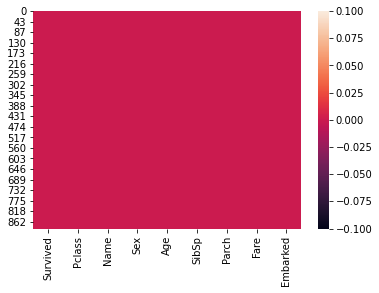

In [19]:
sns.heatmap(titanic_train.isnull())

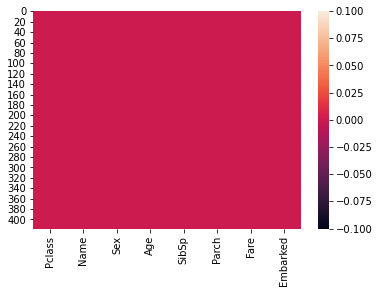

In [20]:
sns.heatmap(titanic_test.isnull())

In [21]:
print(titanic_train.shape)
print(titanic_test.shape)

(889, 9)
(418, 8)


In [22]:
titanic =[titanic_train, titanic_test]

print(titanic)

[     Survived  Pclass                                               Name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        Sex        Age  SibSp  Parch     Fare Embarked  
0      male  22.000000      1

In [23]:
for ds in titanic:
    ds['Title'] = ds.Name.str.extract(' ([A-Za-z]+)\.', expand=True)

pd.crosstab(titanic_train['Title'], titanic_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [24]:
for ds in titanic:
    ds['Title'] = ds['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 
                                       'Sir', 'Jonkheer', 'Dona'], 'Others')

    ds['Title'] = ds['Title'].replace('Mlle', 'Miss')
    ds['Title'] = ds['Title'].replace('Ms', 'Miss')
    ds['Title'] = ds['Title'].replace('Mme', 'Mrs')
    
titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.792000
4,Others,0.347826


In [25]:
print('titanic_train''\n\n',titanic_train.head())
print('\n\n''titanic_test''\n\n',titanic_test.head())

titanic_train

    Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch     Fare Embarked Title  
0    male  22.0      1      0   7.2500        S    Mr  
1  female  38.0      1      0  71.2833        C   Mrs  
2  female  26.0      0      0   7.9250        S  Miss  
3  female  35.0      1      0  53.1000        S   Mrs  
4    male  35.0      0      0   8.0500        S    Mr  


titanic_test

    Pclass                                          Name     Sex   Age  SibSp  \
0       3                              Kelly, Mr. James    male  34.5      0   
1       3              Wil

In [26]:
print(titanic_train['Sex'].unique())
print(titanic_test['Sex'].unique())

['male' 'female']
['male' 'female']


In [27]:
gender_mapping = {"male": 1, "female": 2}
for ds in titanic:
    ds['Sex'] = ds['Sex'].map(gender_mapping).astype(int)
    ds['Sex'] = ds['Sex'].fillna(0)

titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,Mr


In [28]:
print(titanic_train['Embarked'].unique())
print(titanic_test['Embarked'].unique())

['S' 'C' 'Q']
['Q' 'S' 'C']


In [29]:
Journey_start_mapping = {"S": 1, "C": 2, "Q": 3}
for ds in titanic:
    ds['Embarked'] = ds['Embarked'].map(Journey_start_mapping)
    ds['Embarked'] = ds['Embarked'].fillna(0)

titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,71.2833,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,7.9250,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,53.1000,1,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,Mr


In [30]:
print(titanic_train['Title'].unique())
print(titanic_test['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Others']
['Mr' 'Mrs' 'Miss' 'Master' 'Others']


In [31]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Others": 5}
for ds in titanic:
    ds['Title'] = ds['Title'].map(title_mapping)
    ds['Title'] = ds['Title'].fillna(0)

titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,71.2833,2,3
2,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,7.9250,1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,53.1000,1,3
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,1


In [32]:
titanic_train['AgeBand'] = pd.cut(titanic_train['Age'], 5)
titanic_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.401070
3,"(48.168, 64.084]",0.426471
4,"(64.084, 80.0]",0.090909


In [33]:
for ds in titanic:    
    ds.loc[ ds['Age'] <= 16, 'Age'] = 0
    ds.loc[(ds['Age'] > 16) & (ds['Age'] <= 32), 'Age'] = 1
    ds.loc[(ds['Age'] > 32) & (ds['Age'] <= 48), 'Age'] = 2
    ds.loc[(ds['Age'] > 48) & (ds['Age'] <= 64), 'Age'] = 3
    ds.loc[ ds['Age'] > 64, 'Age']
    ds.Age = ds.Age.astype(int)
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,"Braund, Mr. Owen Harris",1,1,1,0,7.2500,1,1,"(16.336, 32.252]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,2,1,0,71.2833,2,3,"(32.252, 48.168]"
2,1,3,"Heikkinen, Miss. Laina",2,1,0,0,7.9250,1,2,"(16.336, 32.252]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,2,1,0,53.1000,1,3,"(32.252, 48.168]"
4,0,3,"Allen, Mr. William Henry",1,2,0,0,8.0500,1,1,"(32.252, 48.168]"


In [34]:
titanic_train['FareBand'] = pd.qcut(titanic_train['Fare'], 4)
titanic_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.896]",0.197309
1,"(7.896, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.577273


In [35]:
for ds in titanic:
    ds.loc[ ds['Fare'] <= 7.91, 'Fare'] = 0
    ds.loc[(ds['Fare'] > 7.91) & (ds['Fare'] <= 14.454), 'Fare'] = 1
    ds.loc[(ds['Fare'] > 14.454) & (ds['Fare'] <= 31), 'Fare']   = 2
    ds.loc[ ds['Fare'] > 31, 'Fare'] = 3
    ds['Fare'] = ds['Fare'].astype(int)
    
titanic_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand
0,0,3,"Braund, Mr. Owen Harris",1,1,1,0,0,1,1,"(16.336, 32.252]","(-0.001, 7.896]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,2,1,0,3,2,3,"(32.252, 48.168]","(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",2,1,0,0,1,1,2,"(16.336, 32.252]","(7.896, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,2,1,0,3,1,3,"(32.252, 48.168]","(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",1,2,0,0,1,1,1,"(32.252, 48.168]","(7.896, 14.454]"
5,0,3,"Moran, Mr. James",1,1,0,0,1,3,1,"(16.336, 32.252]","(7.896, 14.454]"
6,0,1,"McCarthy, Mr. Timothy J",1,3,0,0,3,1,1,"(48.168, 64.084]","(31.0, 512.329]"
7,0,3,"Palsson, Master. Gosta Leonard",1,0,3,1,2,1,4,"(0.34, 16.336]","(14.454, 31.0]"
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,1,0,2,1,1,3,"(16.336, 32.252]","(7.896, 14.454]"
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,0,1,0,2,2,3,"(0.34, 16.336]","(14.454, 31.0]"


In [36]:
titanic_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.343234
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [37]:
titanic_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.341716
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [38]:
titanic_train = titanic_train.drop(['Name'], axis=1)
titanic_test = titanic_test.drop(['Name'], axis=1)

print(titanic_train.columns.values)
print(titanic_test.columns.values)

['Survived' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title'
 'AgeBand' 'FareBand']
['Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title']


In [39]:
print('titanic_train''\n\n',titanic_train.head())
print('\n\n''titanic_test''\n\n',titanic_test.head())

titanic_train

    Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title  \
0         0       3    1    1      1      0     0         1      1   
1         1       1    2    2      1      0     3         2      3   
2         1       3    2    1      0      0     1         1      2   
3         1       1    2    2      1      0     3         1      3   
4         0       3    1    2      0      0     1         1      1   

            AgeBand         FareBand  
0  (16.336, 32.252]  (-0.001, 7.896]  
1  (32.252, 48.168]  (31.0, 512.329]  
2  (16.336, 32.252]  (7.896, 14.454]  
3  (32.252, 48.168]  (31.0, 512.329]  
4  (32.252, 48.168]  (7.896, 14.454]  


titanic_test

    Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title
0       3    1    2      0      0     0         3      1
1       3    2    2      1      0     0         1      3
2       2    1    3      0      0     1         3      1
3       3    1    1      0      0     1         1      1
4       3    2    1      1 

In [40]:
print('titanic_train''\n\n',titanic_train.isnull().sum())
print('\n\n''titanic_test''\n\n',titanic_test.isnull().sum())

titanic_train

 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
AgeBand     0
FareBand    0
dtype: int64


titanic_test

 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64


In [41]:
titanic_train.groupby('Embarked').count()['Survived']

Embarked
1    644
2    168
3     77
Name: Survived, dtype: int64

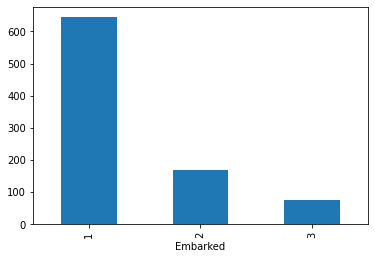

In [42]:
titanic_train.groupby(['Embarked']).count()['Survived'].plot(kind='bar')

In [43]:
titanic_train.groupby('Title').count()['Survived']

Title
1    517
2    184
3    125
4     40
5     23
Name: Survived, dtype: int64

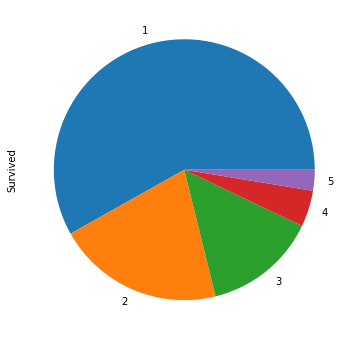

In [44]:
titanic_train.groupby('Title').count()['Survived'].plot(kind='pie',figsize=(8, 6))

In [45]:
titanic_train.groupby('Sex').count()['Survived']

Sex
1    577
2    312
Name: Survived, dtype: int64

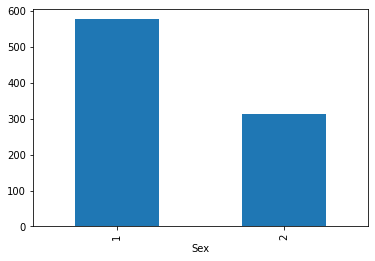

In [46]:
titanic_train.groupby('Sex').count()['Survived'].plot(kind='bar')

In [47]:
titanic_train.groupby('Pclass').count()['Survived']

Pclass
1    214
2    184
3    491
Name: Survived, dtype: int64

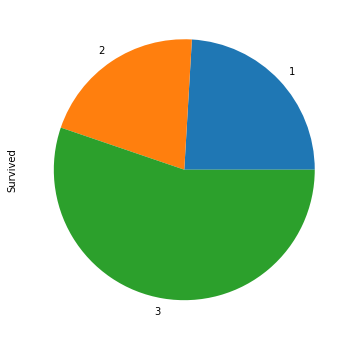

In [48]:
titanic_train.groupby('Pclass').count()['Survived'].plot(kind='pie',figsize=(8, 6))

In [49]:
titanic_train.groupby('FareBand').count()['Survived']

FareBand
(-0.001, 7.896]    223
(7.896, 14.454]    224
(14.454, 31.0]     222
(31.0, 512.329]    220
Name: Survived, dtype: int64

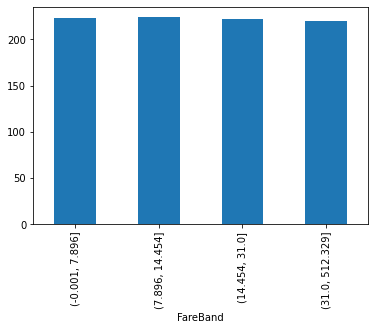

In [50]:
titanic_train.groupby('FareBand').count()['Survived'].plot(kind='bar')

In [51]:
titanic_train.groupby('AgeBand').count()['Survived']

AgeBand
(0.34, 16.336]      100
(16.336, 32.252]    523
(32.252, 48.168]    187
(48.168, 64.084]     68
(64.084, 80.0]       11
Name: Survived, dtype: int64

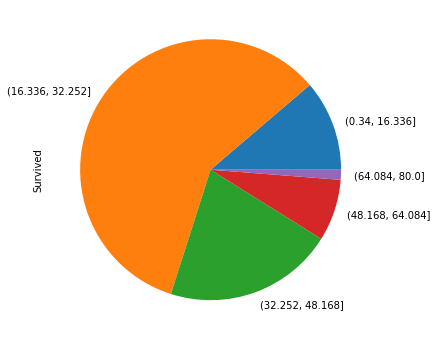

In [52]:
titanic_train.groupby('AgeBand').count()['Survived'].plot(kind='pie',figsize=(8, 6))

In [53]:
titanic_train = titanic_train.drop(['FareBand','AgeBand'], axis=1)
#titanic_test = titanic_test.drop(['Parch','SibSp'], axis=1)
titanic = [titanic_train, titanic_test]

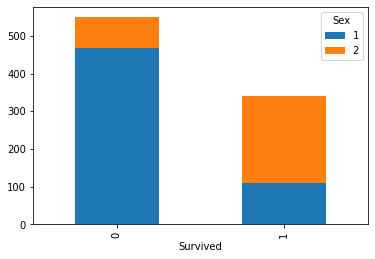

In [54]:
titanic_train.groupby(['Survived','Sex']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

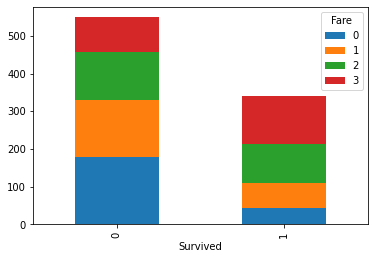

In [55]:
titanic_train.groupby(['Survived','Fare']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

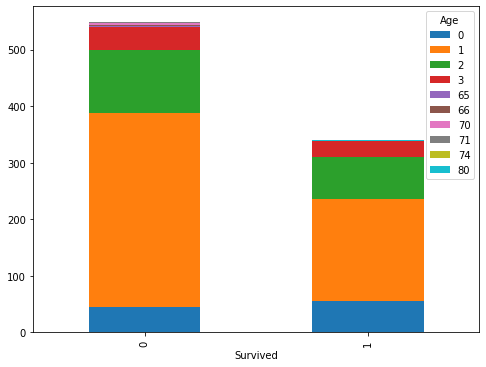

In [56]:
titanic_train.groupby(['Survived','Age']).size().unstack().plot(kind='bar',stacked=True,figsize=(8, 6))
plt.show()

In [57]:
titanic_train.skew()

Survived    0.484568
Pclass     -0.636998
Sex         0.625625
Age         8.762198
Fare       -0.011523
Embarked    1.539926
Title       1.383066
dtype: float64

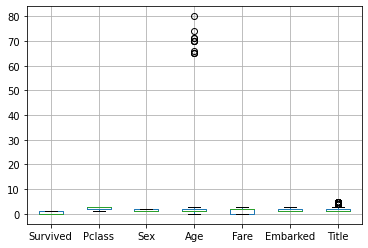

In [58]:
titanic_train.boxplot()

In [59]:
import scipy
from scipy.stats import zscore
zscore=abs(zscore(titanic_train))
print(titanic_train.shape)
titanic_train_1=titanic_train.loc[(zscore<3).all(axis=1)]
print (titanic_train_1.shape)

(889, 7)
(856, 7)


In [60]:
titanic_train_1.skew(axis=0,skipna=True)

Survived    0.466198
Pclass     -0.710166
Sex         0.579917
Age         0.617916
Fare        0.004552
Embarked    1.565724
Title       1.144987
dtype: float64

In [61]:
titanic_train_1.skew(axis=1,skipna=True)

0      1.400000
1      0.000000
2      1.114550
3      0.353045
4      0.863185
         ...   
885   -1.520048
887    0.374166
888   -0.276668
889    1.229634
890    0.681691
Length: 856, dtype: float64

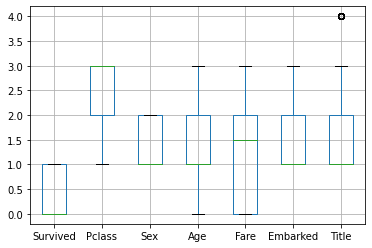

In [62]:
titanic_train_1.boxplot()

In [63]:
titanic_train_1.skew()

Survived    0.466198
Pclass     -0.710166
Sex         0.579917
Age         0.617916
Fare        0.004552
Embarked    1.565724
Title       1.144987
dtype: float64

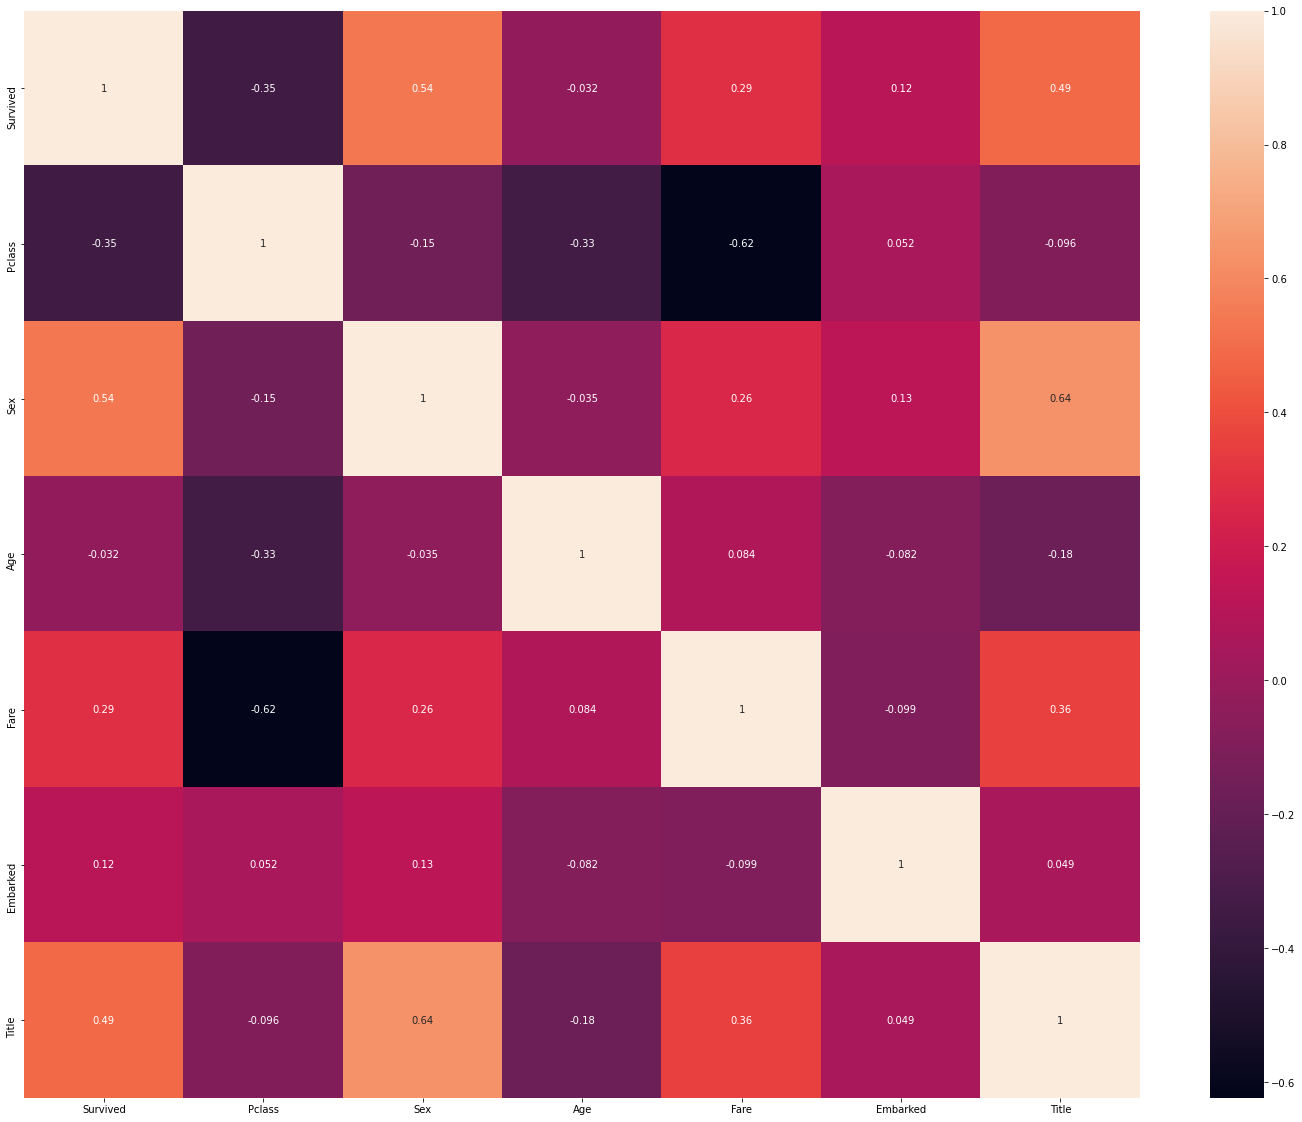

In [64]:
corr_hmap=titanic_train_1.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [65]:
print('titanic_train''\n\n',titanic_train_1.head())
print('\n\n''titanic_test''\n\n',titanic_test.head())

titanic =([titanic_train_1, titanic_test])
print('\n\n''titanic''\n\n',titanic)

titanic_train

    Survived  Pclass  Sex  Age  Fare  Embarked  Title
0         0       3    1    1     0         1      1
1         1       1    2    2     3         2      3
2         1       3    2    1     1         1      2
3         1       1    2    2     3         1      3
4         0       3    1    2     1         1      1


titanic_test

    Pclass  Sex  Age  Fare  Embarked  Title
0       3    1    2     0         3      1
1       3    2    2     0         1      3
2       2    1    3     1         3      1
3       3    1    1     1         1      1
4       3    2    1     1         1      3


titanic

 [     Survived  Pclass  Sex  Age  Fare  Embarked  Title
0           0       3    1    1     0         1      1
1           1       1    2    2     3         2      3
2           1       3    2    1     1         1      2
3           1       1    2    2     3         1      3
4           0       3    1    2     1         1      1
..        ...     ...  ...  ...   ...       ... 

In [66]:
print(titanic_train_1.isnull().sum())
print(titanic_test.isnull().sum())
print(titanic_train_1.dtypes)
print(titanic_test.dtypes)


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
dtype: int64
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
dtype: int64
Survived    int64
Pclass      int64
Sex         int64
Age         int64
Fare        int64
Embarked    int64
Title       int64
dtype: object
Pclass      int64
Sex         int64
Age         int64
Fare        int64
Embarked    int64
Title       int64
dtype: object


In [67]:
x=titanic_train_1.iloc[:,1:]
print(x)

     Pclass  Sex  Age  Fare  Embarked  Title
0         3    1    1     0         1      1
1         1    2    2     3         2      3
2         3    2    1     1         1      2
3         1    2    2     3         1      3
4         3    1    2     1         1      1
..      ...  ...  ...   ...       ...    ...
885       3    2    2     2         3      3
887       1    2    1     2         1      2
888       3    2    1     2         1      2
889       1    1    1     2         2      1
890       3    1    1     0         3      1

[856 rows x 6 columns]


In [68]:
y=titanic_train_1.iloc[:,0]
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 856, dtype: int64


In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=80, random_state=80)

In [70]:
model=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),LinearSVC(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print(predm)


0.8234536082474226
[0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1]
0.8582474226804123
[0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1]
0.8466494845360825
[0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 1]
0.8582474226804123
[0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1]
0.8105670103092784
[0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 1]
0.7822164948453608
[0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1

In [71]:
dtc=RandomForestClassifier()
dtc.fit(x_train,y_train)
pridm=dtc.predict(titanic_test)
print(pridm)

[0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 1]


In [72]:
pridm.shape

(418,)

In [73]:
Id = []
for a in range (892,1310):
    Id.append(a)
print(Id)


[892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 107

In [74]:
len(Id)

418

In [75]:

titanic_survival = pd.DataFrame({
        "PassengerId": Id,
        "Survived": pridm
    })

titanic_survival.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [76]:
titanic_survival.to_csv('titanic_survival_submition.csv',index=False)

In [77]:
titanic_train.groupby('Survived').count()

,Pclass,Sex,Age,Fare,Embarked,Title
Survived,,,,,,
0,549,549,549,549,549,549
1,340,340,340,340,340,340


In [78]:
titanic_survival.groupby('Survived').count()

,PassengerId
Survived,
0,263
1,155


In [79]:
from sklearn.externals import joblib
joblib.dump(dtc,'titanic_survival_submition.pkl')

['titanic_survival_submition.pkl']